In [30]:
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [31]:
SESSION = 'HUNGARIAN'
YEAR = 2023

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

race = fastf1.get_session(YEAR, SESSION, 'R')
race.load()

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '44', '81', '63', '16', '55', '14', '18', '23', '77', '3', '27', '22', '24', '20', '2', '31', '10']


In [32]:
retired_drivers = race.results.loc[race.results['Status'] != 'Finished']

driver_laps = race.laps.reset_index()
drivers = pd.unique(race.laps['Driver'])

stints = driver_laps[["Driver", "Time", "Position", "Stint", "Compound", "LapNumber", "LapTime", "TyreLife"]]
# stints['LapTimeSeconds'] = stints['LapTime'].dt.total_seconds().interpolate(method='bfill')
stints['LapTimeSeconds'] = stints['LapTime'].dt.total_seconds()


C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_7268\785157640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['LapTimeSeconds'] = stints['LapTime'].dt.total_seconds()


In [33]:

stints['FullName'] = stints['Driver'].map(fastf1.plotting.DRIVER_TRANSLATE)
stints['Color'] = stints['FullName'].map(fastf1.plotting.DRIVER_COLORS)
stints['CumulativeLapTime'] = stints.groupby('Driver')['LapTimeSeconds'].cumsum()

stints.reset_index()

C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_7268\278943279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['FullName'] = stints['Driver'].map(fastf1.plotting.DRIVER_TRANSLATE)
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_7268\278943279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['Color'] = stints['FullName'].map(fastf1.plotting.DRIVER_COLORS)
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_7268\278943279.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

,index,Driver,Time,Position,Stint,Compound,LapNumber,LapTime,TyreLife,LapTimeSeconds,FullName,Color,CumulativeLapTime
0,0,VER,0 days 01:03:32.290000,1.0,1.0,MEDIUM,1.0,0 days 00:01:27.912000,4.0,87.912,max verstappen,#0600ef,87.912
1,1,VER,0 days 01:04:57.447000,1.0,1.0,MEDIUM,2.0,0 days 00:01:25.157000,5.0,85.157,max verstappen,#0600ef,173.069
2,2,VER,0 days 01:06:22.517000,1.0,1.0,MEDIUM,3.0,0 days 00:01:25.070000,6.0,85.070,max verstappen,#0600ef,258.139
3,3,VER,0 days 01:07:47.059000,1.0,1.0,MEDIUM,4.0,0 days 00:01:24.542000,7.0,84.542,max verstappen,#0600ef,342.681
4,4,VER,0 days 01:09:11.902000,1.0,1.0,MEDIUM,5.0,0 days 00:01:24.843000,8.0,84.843,max verstappen,#0600ef,427.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,1247,SAR,0 days 02:36:49.825000,15.0,3.0,HARD,66.0,0 days 00:01:24.913000,32.0,84.913,logan sargeant,#012564,5685.447
1248,1248,SAR,0 days 02:38:33.602000,17.0,3.0,HARD,67.0,0 days 00:01:43.777000,33.0,103.777,logan sargeant,#012564,5789.224
1249,1249,OCO,0 days 01:03:51.343000,19.0,1.0,MEDIUM,1.0,0 days 00:01:46.965000,4.0,106.965,esteban ocon,#70c2ff,106.965
1250,1250,OCO,0 days 01:05:32.524000,19.0,1.0,MEDIUM,2.0,0 days 00:01:41.181000,5.0,101.181,esteban ocon,#70c2ff,208.146


In [34]:
# Assuming your DataFrame is named 'df' and you have the 'CumulativeLapTime' column calculated previously
stints['SmallestCumulativeLapTime'] = stints['LapNumber'].map(stints.groupby('LapNumber')['CumulativeLapTime'].min())
stints['IntervalToLeader'] = stints['CumulativeLapTime'] - stints['SmallestCumulativeLapTime']
stints['NormalizedIntervalToLeader'] = stints['CumulativeLapTime'] / stints['SmallestCumulativeLapTime']
stints.to_csv('output.csv')

C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_7268\50821626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['SmallestCumulativeLapTime'] = stints['LapNumber'].map(stints.groupby('LapNumber')['CumulativeLapTime'].min())
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_7268\50821626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['IntervalToLeader'] = stints['CumulativeLapTime'] - stints['SmallestCumulativeLapTime']
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_7268\50821626.

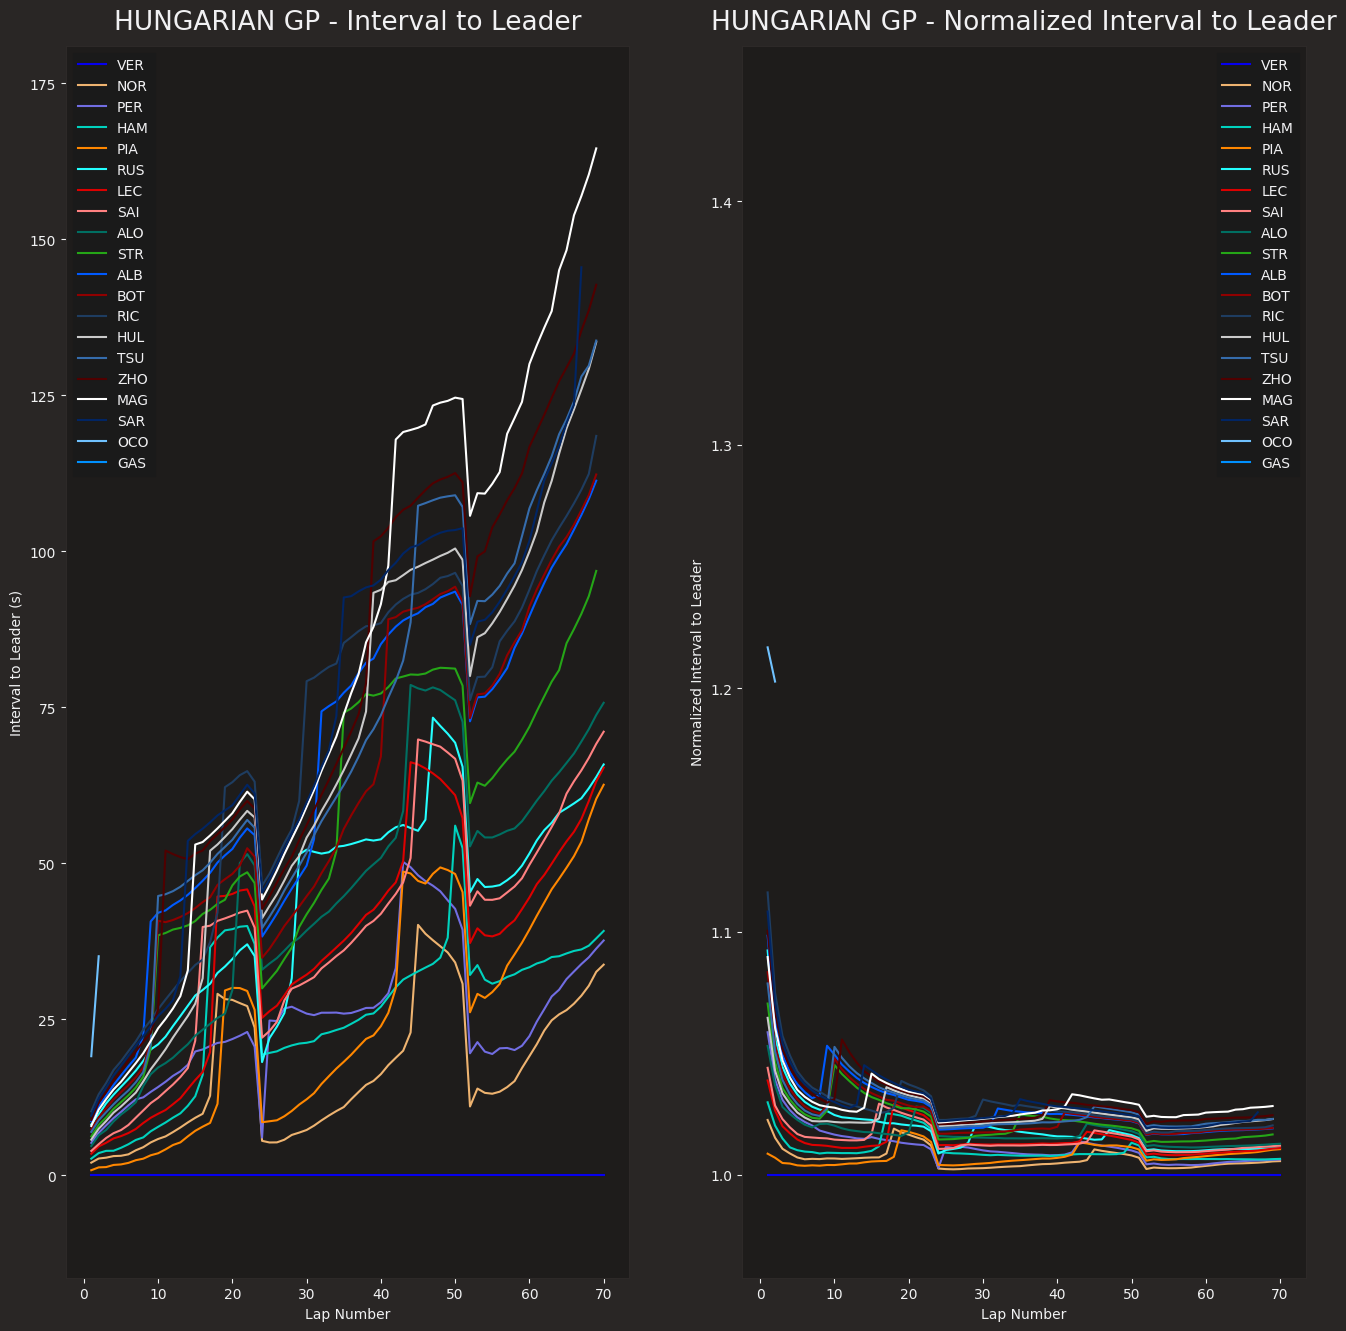

In [35]:
fig, ax = plt.subplots(ncols=2,figsize=(16,16))

for driver in drivers:
    driver_stint = stints.loc[stints['Driver'] == driver].reset_index()
    try:
        driver_color = fastf1.plotting.driver_color(driver)
    except KeyError:
        driver_color = '#1e3d61' 
     
    ax[0].plot(driver_stint["LapNumber"],
            driver_stint["IntervalToLeader"],
            color=driver_color,
            label=driver
           )

ax[0].set_title(f'{SESSION} GP - Interval to Leader')
ax[0].set_xlabel('Lap Number')
ax[0].set_ylabel('Interval to Leader (s)')
ax[0].margins(0.05, 0.1)
ax[0].legend()

for driver in drivers:
    driver_stint = stints.loc[stints['Driver'] == driver].reset_index()
    
    try:
        driver_color = fastf1.plotting.driver_color(driver)
    except KeyError:
        driver_color = '#1e3d61' 
     
    plt.plot(driver_stint["LapNumber"],
            driver_stint["NormalizedIntervalToLeader"],
            color=driver_color,
            label=driver
           )

ax[1].set_title(f'{SESSION} GP - Normalized Interval to Leader')
ax[1].set_xlabel('Lap Number')
ax[1].set_ylabel('Normalized Interval to Leader')
ax[1].margins(0.05, 0.1)
ax[1].legend()